:# On-Time Delivery Prediction – Logistic Regression

In this project, we will use logistic regression to predict whether a package will be delivered **on time** or **late** based on features like:
- Weather conditions
- Traffic density
- Delivery person rating
- Distance
- Type of order and vehicle

---

### Objective
Predict the column `Reached.on.Time_Y.N` (1 = On Time, 0 = Late)

 **Dataset source**: [Kaggle - Customer Analytics](https://www.kaggle.com/datasets/prachi13/customer-analytics)


## Step 1: Import Libraries
This step imports the necessary Python libraries that will be used throughout the project.

- `pandas` → For data manipulation.  
- `numpy` → For numerical operations.  
- `matplotlib.pyplot` → For basic plotting.  
- `seaborn` → For advanced data visualizations.  
- `%matplotlib inline` → Ensures plots display inside the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


## Step 2: Load the Dataset
In this step, we use `pd.read_csv()` to read data from a CSV file and load it into a DataFrame.  
This function helps us convert raw data stored in a file into a structured format that we can analyze and process using Python.

In [3]:
data = pd.read_csv('Train.csv')

## Step 3: Preview the Data
Displays the first 5 rows of the dataset using `data.head()`.  
This helps us get a quick look at the structure of the dataset — column names, values, types, etc.

In [4]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Step 4: Basic Information
we use these functions to understand the structure of the dataset.

- `data.info()`: Shows column names, data types, and the number of non-null values.  
  ➤ Helps you detect column types and check for missing data.

- `data.describe()`: Provides statistical summary of numeric columns such as mean, min, max, standard deviation, etc.  
  ➤ Useful for quick insights into the data distribution.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:

data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Step 5: Check for Missing Values
- `data.isnull().sum()`: Checks for missing (null) values in each column and sums them up.  
  ➤ Helps identify if any columns need data cleaning or imputation before modeling.

In [7]:
data.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


## Step 6: Exploratory Data Analysis (Seaborn & Matplotlib)

Count how many deliveries were on time vs late.

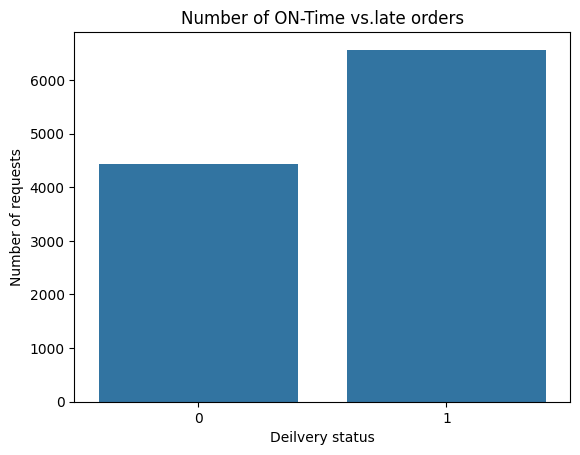

In [8]:
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Number of ON-Time vs.late orders')
plt.xlabel('Deilvery status')
plt.ylabel('Number of requests')
plt.show()

 Compare the ratings of delivery persons between on-time and late deliveries.

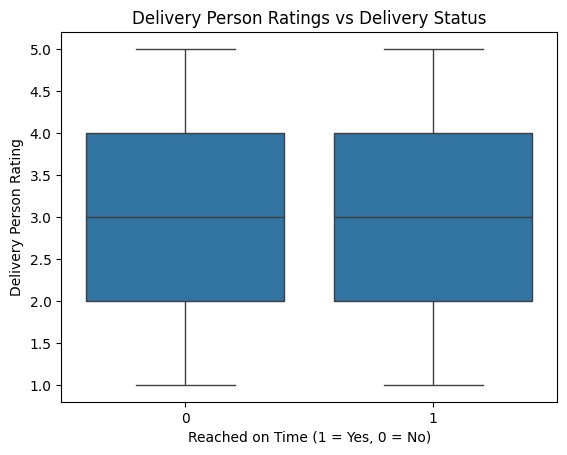

In [9]:
sns.boxplot(x='Reached.on.Time_Y.N', y = 'Customer_rating' ,data=data)
plt.title('Delivery Person Ratings vs Delivery Status')
plt.xlabel('Reached on Time (1 = Yes, 0 = No)')
plt.ylabel('Delivery Person Rating')
plt.show()

Examine the relationship between mode of shipment and delivery status

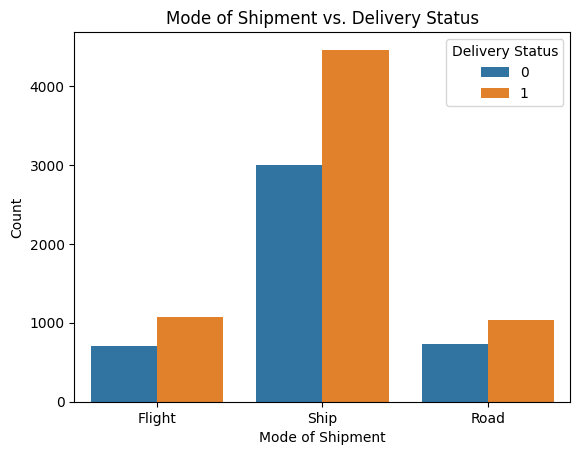

In [10]:
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('Mode of Shipment vs. Delivery Status')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.show()

Explore if high discount offered affects delivery timing.

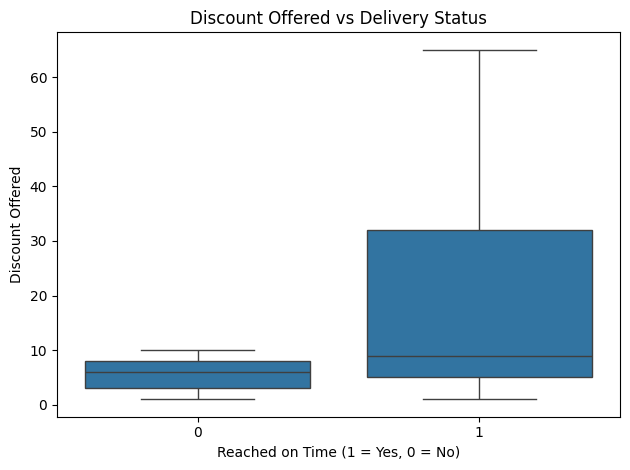

In [11]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data)
plt.title("Discount Offered vs Delivery Status")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Discount Offered")
plt.tight_layout()
plt.show()


Plot a histogram to visualize the distribution of delivery person ratings.

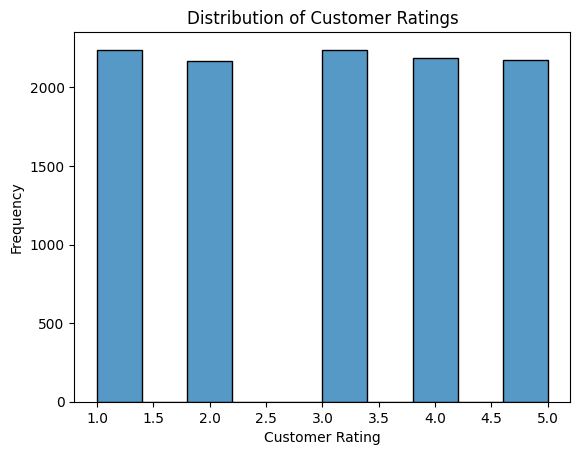

In [12]:
sns.histplot(data['Customer_rating'], bins=10 )
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

What is the distribution of product importance in the dataset?
Visualize it using a pie chart.



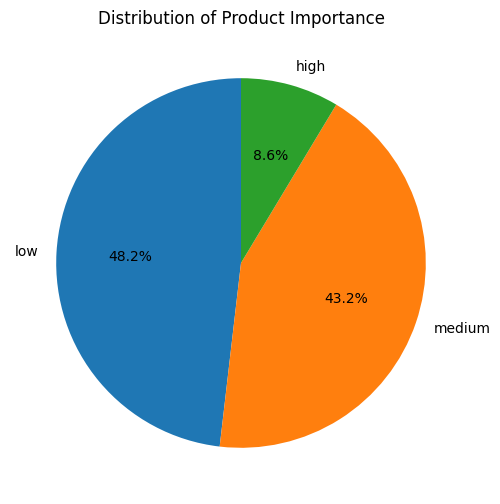

In [13]:
product_counts = data['Product_importance'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product Importance')
plt.show()

## Step 7: Data Preprocessing & Encoding


**Goal:** Prepare the dataset for modeling.


- Drop the `'ID'` column — it's just an identifier.




In [14]:

data.drop('ID', axis=1, inplace=True)

- Use `pd.get_dummies()` to convert categorical columns to numerical (One-Hot Encoding).
  - Set `drop_first=True` to avoid multicollinearity.

In [15]:

data = pd.get_dummies(data, drop_first=True)

## Step 8: Define Features and Target
**Goal:** Separate the features (input) from the target (output) variable.

- Define `X` as all columns except the target `'Reached.on.Time_Y.N'`.
- Define `y` as the target column `'Reached.on.Time_Y.N'`.

In [16]:
X = data.drop('Reached.on.Time_Y.N', axis=1)
y = data['Reached.on.Time_Y.N']

## Step 9: Train/Test Split
**Goal:** Split the dataset into training and testing sets.
- Use `train_test_split()` from `sklearn` to divide `X` and `y`.
- Assign 70% for training and 30% for testing.
- Use `random_state=42` to ensure reproducibility.


In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 10: Train the Logistic Regression Model
**Goal:** Create and train the Logistic Regression model using training data.

- Import `LogisticRegression` from `sklearn.linear_model`.
- Fit the model using `X_train` and `y_train`.

In [18]:

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 11: Make Predictions
Use the trained model to make predictions on `X_test`.  
- Use `.predict()` method  
- Store the results in a variable called `predictions`



In [19]:
predictions = model.predict(X_test)

## Step 12: Evaluate the Model
Evaluate the model performance using the following:

- **Confusion Matrix** using `confusion_matrix()`
- **Accuracy Score** using `accuracy_score()`
- **Classification Report** using `classification_report()`

Print all three results clearly.

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)


cm_df = pd.DataFrame(cm,
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])

print("Confusion Matrix:")
print(cm_df)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", report)
####


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          762          550
Actual 1          660         1328

Accuracy Score: 0.6333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.63      0.64      3300



##italicized text Step 13: Confusion Matrix Heatmap
Visualize the confusion matrix using a heatmap.

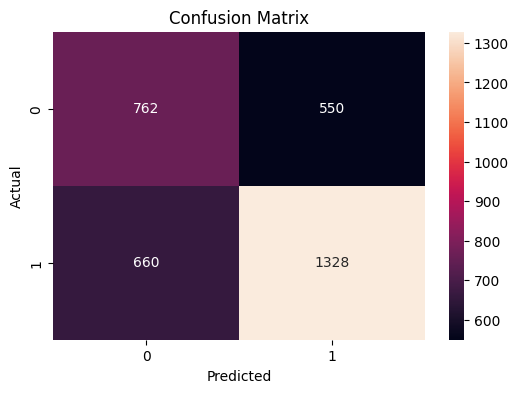

In [21]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##Simplified Extra Analysis:
Percentage View of Key Performance Metrics

1 on time
0 late

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


print("Accuracy:", round(accuracy_score(y_test, predictions)*100))
print("Precision:", round(precision_score(y_test, predictions)*100))
print("Recall:", round(recall_score(y_test, predictions)*100))
print("F1 Score:", round(f1_score(y_test, predictions)*100))

Accuracy: 63
Precision: 71
Recall: 67
F1 Score: 69


##Additional Insight:
 Shipment Mode vs. Weight

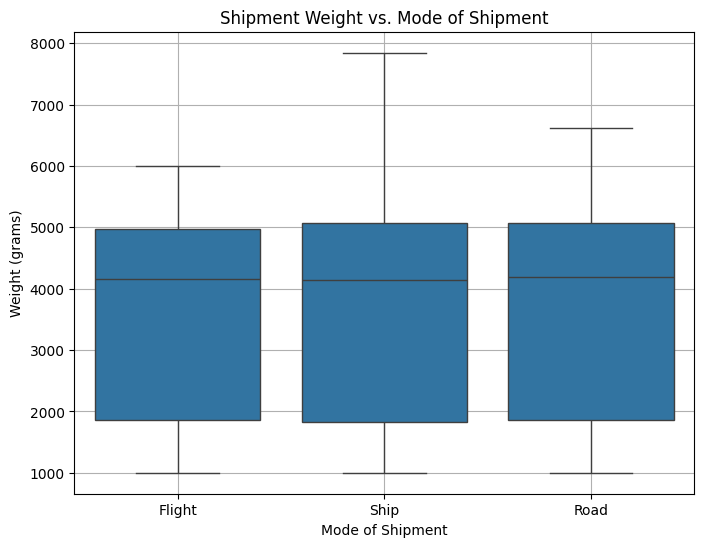

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conditions = [
    data['Mode_of_Shipment_Road'] == 1,
    data['Mode_of_Shipment_Ship'] == 1
]

choices = ['Road', 'Ship']
data['Mode_of_Shipment'] = np.select(conditions, choices, default='Flight')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Mode_of_Shipment', y='Weight_in_gms', data=data)
plt.title('Shipment Weight vs. Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Weight (grams)')
plt.grid(True)
plt.show()
